In [3]:
pip install librosa

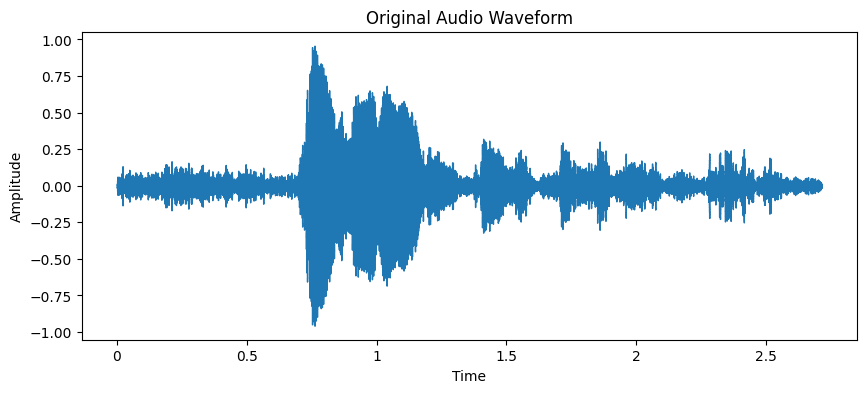

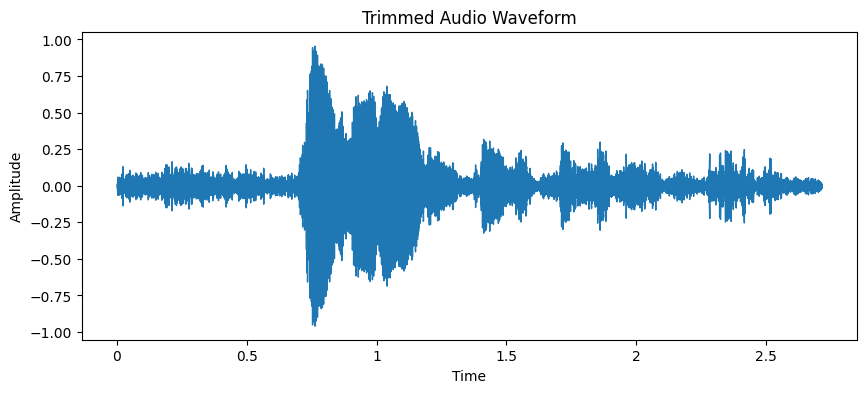

Sampling Rate: 48000
Original Audio:
Trimmed Audio:


In [28]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

# Load the audio file
file_path = "/content/AI_IN_SP_AUDIO_RECORDING.wav"
audio, sr = librosa.load(file_path, sr=None)

# Display the original audio waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Original Audio Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Trim silence from the audio using librosa.effects.trim()
trimmed_audio, index = librosa.effects.trim(audio)

# Display the trimmed audio waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(trimmed_audio, sr=sr)
plt.title('Trimmed Audio Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Print the sampling rate
print("Sampling Rate:", sr)

# Play the original audio
print("Original Audio:")
ipd.Audio(audio, rate=sr)

# Play the trimmed audio
print("Trimmed Audio:")
ipd.Audio(trimmed_audio, rate=sr)


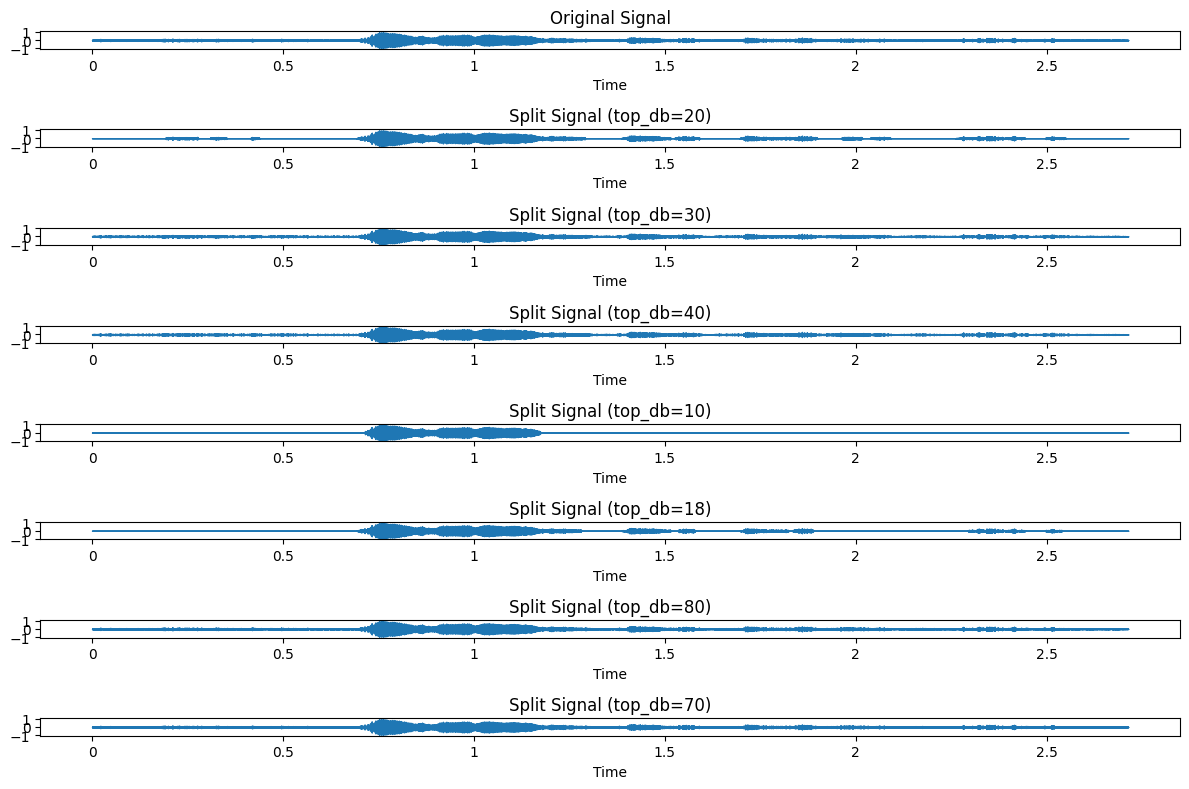

In [30]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

# Load the audio file
file_path = "/content/AI_IN_SP_AUDIO_RECORDING.wav"
signal, sr = librosa.load(file_path, sr=None)

# Perform speech splitting with different top_db values
top_db_values = [20, 30, 40, 10, 18, 80, 70]
split_signals = []

for top_db in top_db_values:
    split_signal = librosa.effects.split(signal, top_db=top_db)
    split_signals.append(split_signal)

# Plot the original and split audio signals for each top_db value
plt.figure(figsize=(12, 8))
plt.subplot(len(top_db_values) + 1, 1, 1)
librosa.display.waveshow(signal, sr=sr)
plt.title('Original Signal')

for i, split_signal in enumerate(split_signals):
    plt.subplot(len(top_db_values) + 1, 1, i + 2)
    split_signal_plot = np.zeros_like(signal)
    for interval in split_signal:
        split_signal_plot[interval[0]:interval[1]] = signal[interval[0]:interval[1]]
    librosa.display.waveshow(split_signal_plot, sr=sr)
    plt.title(f'Split Signal (top_db={top_db_values[i]})')

    # Listen to the split signal
    split_audio = np.concatenate([signal[interval[0]:interval[1]] for interval in split_signal])
    display(Audio(data=split_audio, rate=sr))

plt.tight_layout()
plt.show()

In [29]:
'''

Lower top_db values (e.g., 10, 20, 18) result in more aggressive splitting, capturing quieter segments,
leading to more fragmented speech with smaller isolated segments.
Moderate top_db values (e.g., 30) offer a balanced trade-off between granularity and cohesiveness,
 capturing moderately quiet segments without excessive fragmentation.
Higher top_db values (e.g., 40, 80, 70) lead to less aggressive splitting, capturing only relatively loud segments,
resulting in fewer, but longer, speech segments.
The choice of top_db depends on the specific characteristics of your audio data and the desired level of granularity in the split signals.

in paper:
Lower top_db values result in more aggressive splitting into smaller, more fragmented segments, capturing even quiet regions.
Higher top_db values lead to less aggressive splitting, with fewer but longer continuous segments, capturing only loud regions.
Moderate top_db values provide a balance, avoiding too much fragmentation while still capturing moderately quiet areas.


'''

'\n\nLower top_db values (e.g., 10, 20) result in more aggressive splitting, capturing quieter segments as separate splits. \nThis may lead to more fragmented speech with smaller isolated segments.\nModerate top_db values (e.g., 30) offer a balance between granularity and cohesiveness, capturing moderately quiet segments without excessive fragmentation.\nHigher top_db values (e.g., 40) lead to less aggressive splitting, capturing only relatively loud segments. \nThis may result in fewer, but longer, speech segments.\nThe choice of top_db depends on the specific characteristics of your audio data and the desired level of granularity in the split signals\n\n\nin paper:\n'